In [1]:
import numpy as np
import qibo
import matplotlib as mpl
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt

In [8]:
#Loading data
u = np.load('/Users/stefanopisoni/NoSync/tur_u.npy')
v = np.load('/Users/stefanopisoni/NoSync/tur_v.npy')
w = np.load('/Users/stefanopisoni/NoSync/tur_w.npy')

In [9]:
#Reducing to noq = 3*N.
N = 7

u_N = np.zeros((2**N,2**N,2**N))
v_N = np.zeros((2**N,2**N,2**N))
w_N = np.zeros((2**N,2**N,2**N))

for i in range(2**N):
    for j in range(2**N):
        for k in range(2**N):
            u_N[i,j,k] = u[i*(2**(10-N)),j*(2**(10-N)),k*(2**(10-N))]

for i in range(2**N):
    for j in range(2**N):
        for k in range(2**N):
            v_N[i,j,k] = v[i*(2**(10-N)),j*(2**(10-N)),k*(2**(10-N))]

for i in range(2**N):
    for j in range(2**N):
        for k in range(2**N):
            w_N[i,j,k] = w[i*(2**(10-N)),j*(2**(10-N)),k*(2**(10-N))]

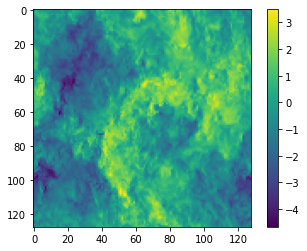

In [11]:
plt.imshow(u_N[:,:,5])
plt.colorbar()
plt.show()

Stacked architecture flattening

In [4]:
psi_u_stacked = u_N.T
psi_u_stacked = psi_u_stacked.flatten()

psi_v_stacked = v_N.T
psi_v_stacked = psi_v_stacked.flatten()

psi_w_stacked = w_N.T
psi_w_stacked = psi_w_stacked.flatten()

Other initial encoding

In [10]:
#XYZXYZ ENCODING FUNCTION

def shuffle_axis_3D(A: np.array, L: int):
    # tensorize A and shuffle odd and even axis and return a matrix
    new_axis = []
    for x in range(L):
        new_axis += [x, x + L, x + 2*L]
    A = A.reshape([2] * 3 * L).transpose(new_axis).reshape(2**L, 2**L, 2**L)
    return A

In [11]:
psi_u_sequencial = shuffle_axis_3D(u_N.T,N)
psi_u_sequencial = psi_u_sequencial.flatten()

psi_v_sequencial = shuffle_axis_3D(v_N.T,N)
psi_v_sequencial = psi_v_sequencial.flatten()

psi_w_sequencial = shuffle_axis_3D(w_N.T,N)
psi_w_sequencial = psi_w_sequencial.flatten()

Normalize the statevector

In [5]:
psi_u_stacked = psi_u_stacked/(np.linalg.norm(psi_u_stacked))
psi_u_sequencial = psi_u_sequencial/(np.linalg.norm(psi_u_sequencial))

psi_v_stacked = psi_v_stacked/(np.linalg.norm(psi_v_stacked))
psi_v_sequencial = psi_v_sequencial/(np.linalg.norm(psi_v_sequencial))

psi_w_stacked = psi_w_stacked/(np.linalg.norm(psi_w_stacked))
psi_w_sequencial = psi_w_sequencial/(np.linalg.norm(psi_w_sequencial))

Take all possible pairs of bits and compute their density matrix + correlations.
Number of pairs = combinations(n,r) = C(n,r) = n!/(r!(n-r)!). All_combinations[i]=pairs[C(n,r)-1-i] and viceversa.

In [6]:
# Generating a list of integers corresponding to their index
list_qubits = [i for i in range(3*N)]

# All possible pairs in List
# Using list comprehension + enumerate()
pairs = [(a, b) for idx, a in enumerate(list_qubits) for b in list_qubits[idx + 1:]]

# printing pairs
print("All possible pairs : " + str(pairs))


#List to pass to qi.DensityMatrix qiskit method, i.e. the list of all elements but the two to trace out
from itertools import combinations

# Generate all possible sets of 3*N-2 elements (same length as list of pairs = (3N)*(3N-1)/2),
#different method from before.
all_combinations = list(combinations(list_qubits, 3*N-2))

print(len(all_combinations))
print(len(pairs))

All possible pairs : [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (5, 20), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6,

START FROM HERE WHEN CHANGING THE ENCODING

In [7]:
psi_u_qiskit = qi.Statevector(psi_u_stacked)
#rho_u = qi.DensityMatrix(psi_u_qiskit)


#Index the list rho_reduced same as pairs.
rho_reduced = []
for i in range(len(pairs)):
    rho_reduced.append(qi.partial_trace(psi_u_qiskit, all_combinations[len(pairs)-1-i]))

CORRELATION:
Compute the correlation for each density matrix and associate it to the corresponding pair of qubits (add to the pair list the corr value). The list of density matrices rho_reduced is already ordered according to the pairs list.

Mutual information

In [9]:
mutual_info = []
cross = []
single_qb_entropy = []
rho_single_qb = []

all_single_combinations = list(combinations(list_qubits, 3*N-1))

for i in range(3*N):
    rho_single_qb.append(qi.partial_trace(psi_u_qiskit, all_single_combinations[3*N-1-i]))

for i in range(3*N):
    a = qi.entropy(rho_single_qb[i])
    single_qb_entropy.append(a)

for i in range(len(pairs)):
    a = pairs[i]
    b = a[0]
    c = a[1]
    d = single_qb_entropy[b]
    e = single_qb_entropy[c]
    cross.append(d + e - qi.entropy(rho_reduced[i]))

for i in range(len(pairs)):
    tuple = pairs[i] + (cross[i],)
    mutual_info.append(tuple)

Equivalent list but sorted according to correlation values

In [15]:
decreasing_correlation = []
decreasing_correlation = sorted(mutual_info, key=lambda x: x[2], reverse=True)


#Truncate list when correlation<eps
eps = 0.03
decreasing_correlation_truncated = []

for i in decreasing_correlation:
    a = i[2]
    if a >= eps:
        decreasing_correlation_truncated.append(i)


len(decreasing_correlation_truncated)

49

In [16]:
decreasing_correlation_truncated

[(11, 12, 0.10811788874849437),
 (5, 6, 0.10527995379648947),
 (17, 18, 0.09154794715285619),
 (3, 4, 0.08733755849679437),
 (4, 5, 0.0868640980071067),
 (16, 17, 0.08381255594617776),
 (9, 10, 0.08230010334030635),
 (12, 19, 0.08118830847628544),
 (18, 19, 0.08060500526931569),
 (2, 3, 0.07800317833561021),
 (10, 11, 0.07702012547069637),
 (6, 13, 0.07357552084660379),
 (8, 9, 0.0730141643749832),
 (15, 16, 0.07237033230421974),
 (1, 2, 0.06302250517866947),
 (5, 13, 0.06047180194729229),
 (14, 15, 0.058143081297976296),
 (7, 8, 0.057966653355146114),
 (6, 20, 0.04406961076639382),
 (3, 16, 0.04343634241612215),
 (0, 1, 0.04311386560492475),
 (3, 9, 0.04308549201306833),
 (2, 9, 0.04146144203086144),
 (2, 16, 0.04093987982435188),
 (19, 20, 0.04043117331091706),
 (9, 16, 0.039775185757671805),
 (2, 15, 0.039483168110032385),
 (12, 18, 0.03945332070666985),
 (2, 8, 0.03940917706422642),
 (3, 17, 0.03640211267907367),
 (2, 4, 0.03616048098824742),
 (3, 10, 0.03589996656593941),
 (8, 15,

Entanglement entropy

In [53]:
ent_entropy = []

for i in range(len(pairs)):
    tuple = pairs[i] + (qi.entropy(rho_reduced[i]),)
    ent_entropy.append(tuple)

NetworkX

In [12]:
#Create a new list where edge weights lower than 'eps' are erased
eps = 0.03
zerod_out_edges = []

for i in mutual_info:
    a = i[2]
    if a >= eps:
        zerod_out_edges.append(i)

In [13]:
import networkx as nx


G = nx.Graph()

for edge in zerod_out_edges:
    node1, node2, weight = edge
    G.add_edge(node1, node2, weight=weight)

/Users/stefanopisoni/opt/anaconda3/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:462: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/var/folders/78/3qnd64k56s5fxxztb82f1rcc0000gn/T/ipykernel_7800/1731004316.py:16: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  edge_collection = nx.draw_networkx_edges(H, pos, edge_color=edge_colors, width=2, edge_cmap=plt.cm.autumn_r)


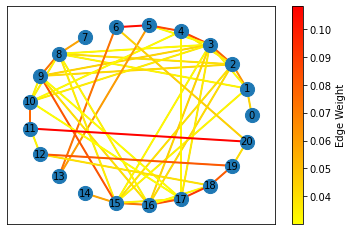

In [14]:
#Sort nodes to plot them ordered 
nodes_sorted = list(G.nodes(data=True))
edges_sorted = list(G.edges(data=True))
nodes_sorted = sorted(nodes_sorted, key=lambda x: x[0])

# Define edge colors based on weights
edge_colors = [edge[2] for edge in zerod_out_edges]

H=nx.Graph()
H.add_nodes_from(nodes_sorted)
H.add_edges_from(edges_sorted)

pos = nx.circular_layout(H)
nx.draw_networkx(H, pos, with_labels=True, node_size=200, font_size=10, font_color="black", edge_color=edge_colors, cmap=plt.cm.autumn_r)

edge_collection = nx.draw_networkx_edges(H, pos, edge_color=edge_colors, width=2, edge_cmap=plt.cm.autumn_r)
cbar = plt.colorbar(edge_collection, label='Edge Weight')


plt.show()

In [118]:
print("Nodes:", H.nodes())
print("Edges:", H.edges(data=True))

#sorted_nodes = sorted(G.nodes)

Nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Edges: [(1, 4, {'weight': 0.033413384488213516}), (2, 5, {'weight': 0.033722816786850685}), (3, 6, {'weight': 0.042977663124804055}), (4, 7, {'weight': 0.057940003102717186}), (5, 8, {'weight': 0.058188021973331505}), (6, 7, {'weight': 0.032612333814104444}), (6, 8, {'weight': 0.032562454044418154}), (6, 9, {'weight': 0.06298304741072769}), (6, 12, {'weight': 0.032010268073693116}), (7, 8, {'weight': 0.03536734242899997}), (7, 9, {'weight': 0.03940586812556113}), (7, 10, {'weight': 0.07327578557679815}), (7, 11, {'weight': 0.03364523684759202}), (7, 12, {'weight': 0.03168505014376699}), (7, 13, {'weight': 0.03423986949851798}), (8, 9, {'weight': 0.03947183684153288}), (8, 10, {'weight': 0.03363039647037869}), (8, 11, {'weight': 0.07257444122013135}), (8, 12, {'weight': 0.03185889737375569}), (8, 14, {'weight': 0.03442719545043138}), (9, 10, {'weight': 0.04162082091906005}), (9, 11, {'weight': 0.0

Old not-sorted nodes

/var/folders/78/3qnd64k56s5fxxztb82f1rcc0000gn/T/ipykernel_23792/415160605.py:12: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  edge_collection = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2, edge_cmap=plt.cm.autumn_r)


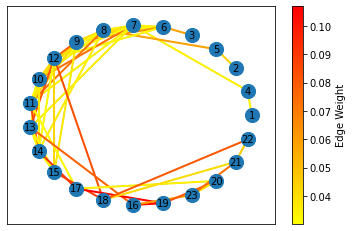

In [111]:

# Define edge colors based on weights
edge_colors = [edge[2] for edge in zerod_out_edges]

# Draw the graph with edge colors
pos = nx.circular_layout(G)  # Define the layout for the nodes
nx.draw_networkx(G, pos, with_labels=True, node_size=200, font_size=10, font_color="black", edge_color=edge_colors, cmap=plt.cm.autumn_r)

# Draw edge labels
#edge_labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

edge_collection = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2, edge_cmap=plt.cm.autumn_r)
cbar = plt.colorbar(edge_collection, label='Edge Weight')

# Show the plot
plt.show()